# Shifting then Tilting HG(0,0) : Phase shift relative to reference beam

***
### The effect of a tilt to an already misaligned beam of fundamental mode:

$
	\sum_{n,m} u_{nm}(x,y,0)= u_{00(tilt)}(x,y,0)+ \frac{a}{w_0}u_{10(tilt)}(x,y,0) \; .
$

The first term is verified to be

$
	u_{00 (tilt)} \approx u_{00}(x,y,0) + i  \frac{\pi w_{0} \alpha}{\lambda}u_{10} \; .
$

The second term approximates to

$
		\frac{a}{w_0} u_{tilt(1,0)}(x,y,0) 			 
			\approx  
			\frac{a}{w_0} 
			u_{10} 
			 \left[
			1 + i \frac{2 \pi x \alpha}{\lambda} \right] \;.
$

***
Therefore:

$
		u(x,y,0)=
			\left[
				1+
				i \frac{ \pi a \alpha}{ \lambda}
			\right]
			u_{00}
			+
			\left[
				i  \frac{\pi w_{0} \alpha}{\lambda}
			+
			\frac{a}{w_{0}}
			\right]			
			u_{10}
			+
			i  
				\frac{\sqrt{2} \pi a \alpha}{ \lambda}
			u_{20}	.
$

***
### Photodetector role
For a reference and received beam:



\begin{equation} \label{eq:19}
	E_{ref} = 
		E_{0\; (ref)} e^{i( \omega_{ref} t+\phi_{1})}
		u_{00}(w_{0\; ref},z_{0\; ref})	
	\;.
\end{equation}

\begin{equation} \label{eq:18}
	E_{rec} = 
		E_{0\; (rec)} e^{i ( \omega_{rec}t+\phi_{2})} 			
		\sum_{n,m=0}u_{nm}(w_{0\; rec},z_{0\; rec}) 		
	\;,
\end{equation}

Power at the photodetector:

\begin{equation}\label{eq:20}
	P_{pd}= \int_{- \infty}^{\infty}\int_{- \infty}^{\infty} E^*E \; dxdy,
\end{equation}

Orthnormality of HG modes:

\begin{equation}
	\int \int dx dy \; u_{nm} u_{n'm'}^* = \delta_{nn'} \delta_{mm'}.
\end{equation}

so only the imaginary portion of $u_{00}$ received beam contributes to phase shift (TTL coupling) for a reference beam in $u_{00}$.

***
### Received and Reference combined field
Combined field:
\begin{equation}
	E = 
    u_{00}
    \lbrace
			E_{0(ref)} 
			e^{i(( \omega_{ref} t)+\phi_{1})} 
			+
			E_{0(rec)}			
			e^{i (( \omega_{rec}t)+\phi_{2})}
			\left[
			1+i \frac{\pi a \alpha}{\lambda}
			\right]	 
    \rbrace 
    \; .
\end{equation}

Let $\Delta \phi = \phi_{ref}-\phi_{rec}$ and $\Delta \omega = \omega_{ref}-\omega_{rec}$ and condensing $E_{0}$ terms:


\begin{equation}
	E^{*}E = 
    u_{00}^*u_{00}
		|E_{0}|^2 
		\lbrace
        2
        +
        (\frac{\pi a \alpha }{\lambda})^2
        +
			e^{i (\Delta \omega t + \Delta \phi) }
				\left[
					1 - \frac{\pi a \alpha }{\lambda}
				\right]
			+
			e^{-i(\Delta \omega t + \Delta \phi) }
				\left[
					1 + \frac{\pi a \alpha }{\lambda}
				\right]
		\rbrace 
		\;.
\end{equation}

The time-varying terms (at $t=0$):

\begin{equation}
	E^{*}E = 
    u_{00}^*u_{00}
		|E_{0}|^2 
		\lbrace
			e^{i  \Delta \phi }
				\left[
					1 - \frac{\pi a \alpha }{\lambda}
				\right]
			+
			e^{-i \Delta \phi }
				\left[
					1 + \frac{\pi a \alpha }{\lambda}
				\right]
		\rbrace 
		\;.
\end{equation}


Phase shift is expected to be proportional to misaignment angle:
\begin{equation}
	\Delta \phi = \phi_{1} - \phi_{2} \propto \arctan (\frac{a \alpha \pi}{\lambda}) \approx \frac{a \alpha \pi}{\lambda} \; .
\end{equation}

and
\begin{equation}
	\frac{d \phi}{d \alpha} \approx \frac{a \pi}{\lambda} \; .
\end{equation}

In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.integrate import dblquad

In [15]:
#Redefining and naming initial parameters
high_res_plane = pl.Plane(-6e-3,7e-3,1000,-1e-3,1e-3,3) #just used to calculate peak, higher precision
plane = pl.Plane(-2e-2,2e-2,1000,-1e-3,1e-3,3)
params = pl.Params(wavelength=1.064e-06, w0=1e-3, z0=0)

wavelength = params.wavelength
w0 = params.w0

#scales of each mode
c00_ref = 1
c00 = 1*(1+2e-7j)

#create modes received and reference (rec and ref)
modes_rec = pl.modes((0,0,c00))
modes_ref = pl.modes((0,0,c00_ref))


#calculate amp. and phase
result_rec = pl.calculate(params, plane, modes_rec, z=0)
result_ref = pl.calculate(params,plane,modes_ref, z=0)


        


## Comparing ref and rec 

peak shift: 7.000000000000062e-06 [m]


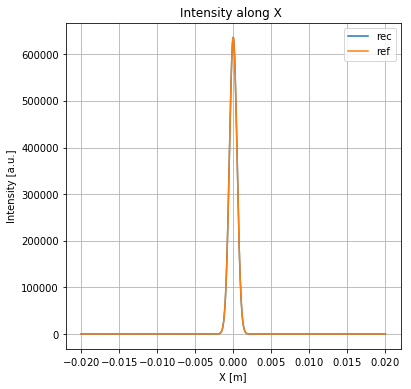

In [16]:
#plot
pl.intslicex(0, result_rec, result_ref, labels=['rec','ref'])

#compare to approx. (using high-res plane to find peak)
result_peak = pl.calculate(params, high_res_plane, modes_rec, z=0)
act_shift = abs(pl.PeakInt(result_peak).x[0])

#compare shift to approx.
print("peak shift:",act_shift,'[m]')

ref phase: 0.0 [rad]


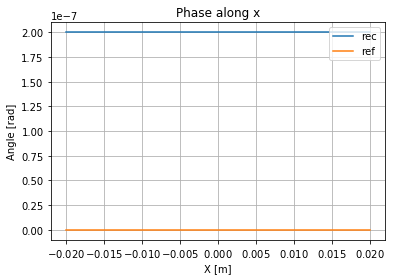

In [17]:
#plot
pl.phaseslicex(0, result_rec, result_ref,labels=['rec','ref'])

#results
print("ref phase:",result_ref.phase[0][0],'[rad]')

## Combining ref and rec

In [18]:
#combined (comb)
modes_comb = pl.modes((0,0,c00+c00_ref))
amp_comb = result_rec.amp+result_ref.amp

result_row = len(amp_comb)
result_col = len(amp_comb[0])
phase_comb = np.zeros((result_row,result_col), dtype=float)
for r in range(result_row):
    for c in range(result_col):
        phase_comb[r,c] = (np.angle(amp_comb[r][c]))

result_comb = pl.Result(params,plane,modes_comb,0,amp_comb,phase_comb)

combined phase diff: 9.999999999999966e-08 [rad]


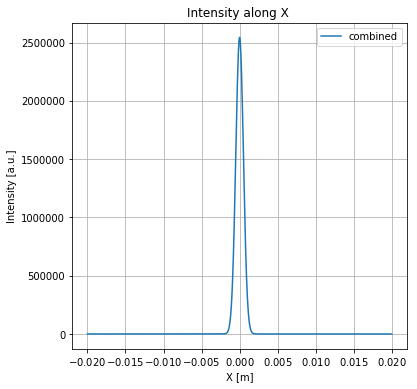

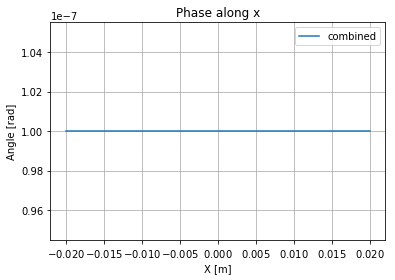

In [22]:
#plot
pl.intslicex(0, result_comb, labels=['combined'])
pl.phaseslicex(0, result_comb,labels=['combined'])

off = result_comb.phase[0][0]

print("combined phase diff:",result_comb.phase[0][0], "[rad]")

In [23]:
d_phi=np.angle(np.e**(off*1j)*(1-c00.imag)+np.e**(-off*1j)*(1+c00.imag))

print("d phi=",d_phi, "[rad/root(Hz)]", "~", d_phi, "[pm/root(Hz)]" )

d phi= -1.9999999999758082e-14 [rad/root(Hz)] ~ -1.9999999999758082e-14 [pm/root(Hz)]


In [27]:
#magnification and subtraction
mag = 134

d_phi_mag = d_phi*mag
post_subtraction = d_phi_mag/20

print("after subtraction", post_subtraction, " [rad/root(Hz)]")

after subtraction -1.3399999999837915e-13  [rad/root(Hz)]
